In [1]:
# Electricity Load Forecasting - Exploratory Data Analysis (EDA)

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "data/train_dataframes.xlsx"  # Change this to your file path
xls = pd.ExcelFile(file_path)

# Load a subset of sheets (first 5) for efficient analysis
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to proper format
df["datetime"] = pd.to_datetime(df["datetime"])

# Display first few rows
df.head()


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [2]:
# Summary statistics
df.describe()


,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
count,191496,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000,191496.000000
mean,2017-04-08 12:29:05.857876992,1176.499831,1175.903057,1175.091844,1176.051456,3.996345,0.286225,0.063291,0.706229,11.500000,27.380136,1178.085738
min,2015-01-31 01:00:00,85.192500,85.192500,85.192500,793.602650,1.000000,0.000000,0.000000,0.000000,0.000000,22.953455,85.192500
25%,2016-03-04 23:00:00,1008.825375,1008.200625,1007.582600,1010.158775,2.000000,0.000000,0.000000,0.000000,5.750000,26.145105,1010.655500
50%,2017-04-07 22:00:00,1164.978800,1164.488400,1163.459100,1170.406725,4.000000,0.000000,0.000000,0.000000,11.500000,27.103952,1166.731600
75%,2018-05-11 21:00:00,1323.608200,1322.897500,1321.969700,1315.663975,6.000000,1.000000,0.000000,0.000000,17.250000,28.533136,1325.150400
max,2019-08-14 00:00:00,1719.043900,1719.043900,1719.043900,1651.254750,7.000000,1.000000,1.000000,22.000000,23.000000,35.039575,1719.043900
std,NaN,192.832529,192.753796,192.651566,185.021215,1.999636,0.451997,0.243487,3.143512,6.922205,1.685773,192.725298


In [3]:
# Checking for missing values
df.isnull().sum()


datetime      0
week_X-2      0
week_X-3      0
week_X-4      0
MA_X-4        0
dayOfWeek     0
weekend       0
holiday       0
Holiday_ID    0
hourOfDay     0
T2M_toc       0
DEMAND        0
dtype: int64

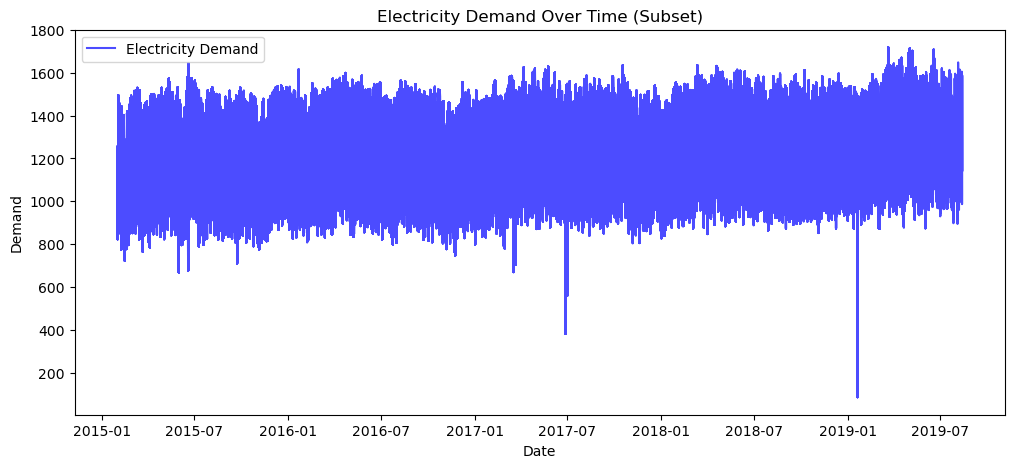

In [4]:
# Plot electricity demand over time
plt.figure(figsize=(12, 5))
plt.plot(df["datetime"], df["DEMAND"], label="Electricity Demand", color="blue", alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Electricity Demand Over Time (Subset)")
plt.legend()
plt.show()


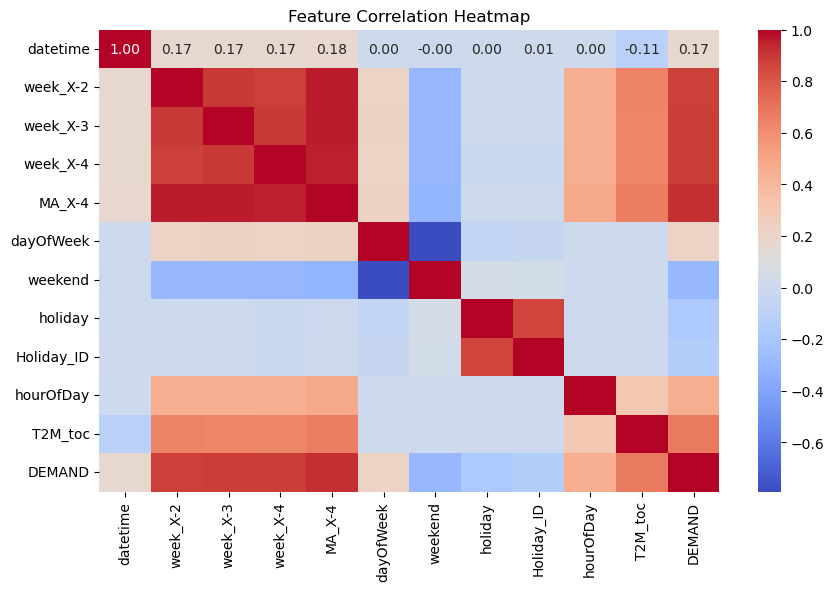

In [5]:
# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


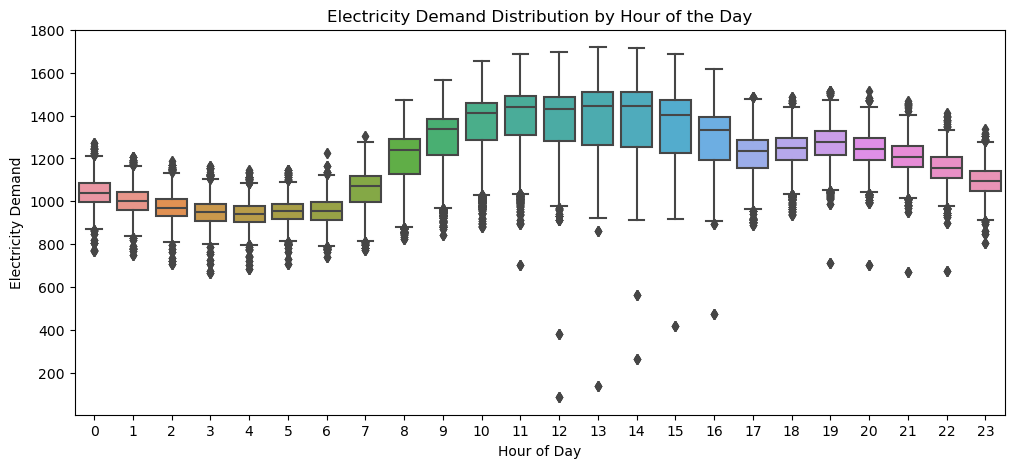

In [6]:
# Boxplot of demand by hour of the day
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["hourOfDay"], y=df["DEMAND"])
plt.xlabel("Hour of Day")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Distribution by Hour of the Day")
plt.show()


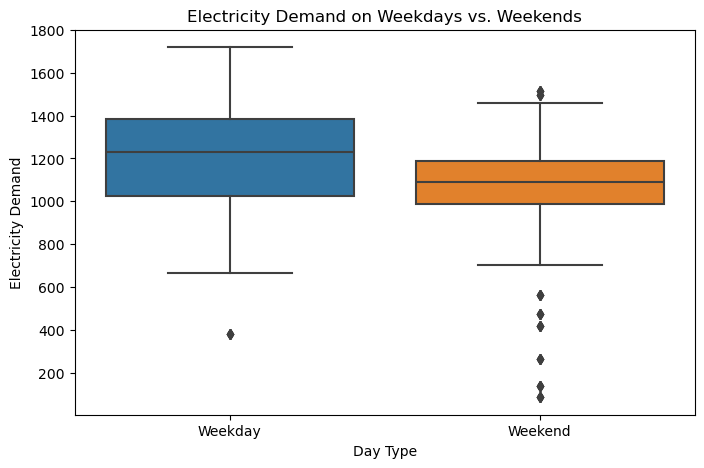

In [7]:
# Boxplot of demand based on weekends vs. weekdays
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["weekend"], y=df["DEMAND"])
plt.xticks(ticks=[0, 1], labels=["Weekday", "Weekend"])
plt.xlabel("Day Type")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand on Weekdays vs. Weekends")
plt.show()


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "data/train_dataframes.xlsx"  # Change this path
xls = pd.ExcelFile(file_path)

# Load selected sheets (first 5 to optimize performance)
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191496 entries, 2015-01-31 01:00:00 to 2019-08-14 00:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   week_X-2    191496 non-null  float64
 1   week_X-3    191496 non-null  float64
 2   week_X-4    191496 non-null  float64
 3   MA_X-4      191496 non-null  float64
 4   dayOfWeek   191496 non-null  int64  
 5   weekend     191496 non-null  int64  
 6   holiday     191496 non-null  int64  
 7   Holiday_ID  191496 non-null  int64  
 8   hourOfDay   191496 non-null  int64  
 9   T2M_toc     191496 non-null  float64
 10  DEMAND      191496 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 17.5 MB


,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
datetime,,,,,,,,,,,
2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


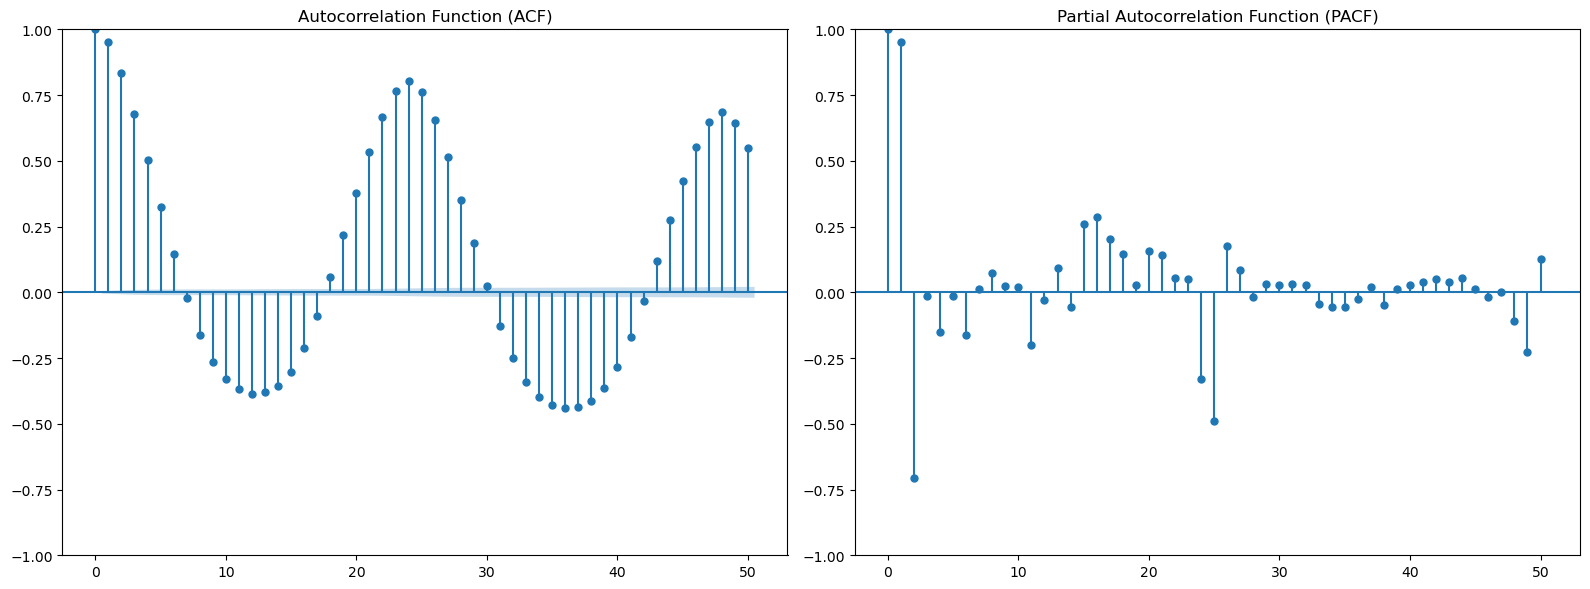

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'combined_df' is your full dataset
# Use the 'DEMAND' column
demand_series = df['DEMAND']

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ACF plot
plot_acf(demand_series.dropna(), lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(demand_series.dropna(), lags=50, method='ywm', ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [36]:
# Create lag features (important lags based on ACF/PACF)
for lag in [1, 7, 14, 21, 28]:
    df[f"lag_{lag}"] = df["DEMAND"].shift(lag)

# Create rolling statistics (3-day, 7-day, 14-day moving averages)
df["rolling_mean_3"] = df["DEMAND"].rolling(window=3, min_periods=1).mean()
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7, min_periods=1).mean()
df["rolling_mean_14"] = df["DEMAND"].rolling(window=14, min_periods=1).mean()

# Optionally: create rolling std deviation (helps in volatile demand)
df["rolling_std_7"] = df["DEMAND"].rolling(window=7, min_periods=1).std()

# Time-based features
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)  # New feature

# Drop NaN values generated by lagging
df.dropna(inplace=True)

# Display updated data
df.head()


,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,...,lag_21,lag_28,rolling_mean_3,rolling_mean_7,rolling_mean_14,rolling_std_7,hour,dayofweek,month,is_weekend
datetime,,,,,,,,,,,,,,,,,,,,,
2015-02-02 09:00:00,1252.6120,1317.0702,1319.8159,1295.574350,3,0,0,0,9,28.670435,...,1056.4006,849.8465,1225.042200,1033.615371,1012.471757,202.639594,9,0,2,0
2015-02-02 10:00:00,1330.4315,1413.0273,1383.0651,1363.708125,3,0,0,0,10,29.716058,...,1077.2239,822.2660,1346.918333,1113.063186,1036.168821,232.790896,10,0,2,0
2015-02-02 11:00:00,1362.5769,1452.0040,1415.1816,1398.067700,3,0,0,0,11,30.484735,...,1088.7217,838.5545,1419.719800,1197.994800,1062.631164,236.750417,11,0,2,0
2015-02-02 12:00:00,1358.9632,1439.2499,1398.8659,1391.155650,3,0,0,0,12,31.006494,...,1046.6546,899.4324,1448.092000,1278.773800,1092.986286,210.971734,12,0,2,0
2015-02-02 13:00:00,1383.8766,1468.9201,1430.5514,1417.568625,3,0,0,0,13,31.310358,...,1017.8311,965.9481,1469.234367,1357.865429,1128.099307,155.897228,13,0,2,0


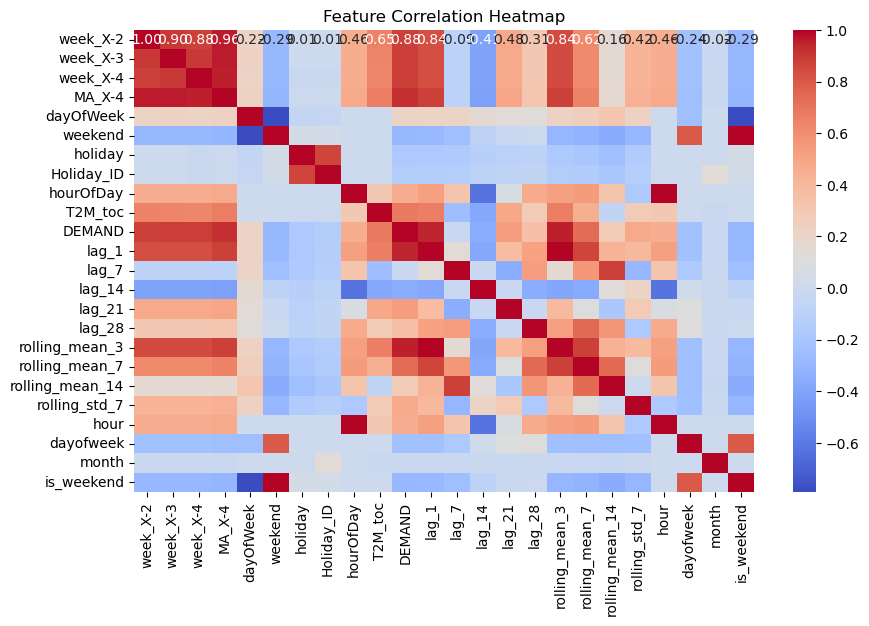

In [37]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features based on correlation
features = ["lag_1", "lag_2", "lag_3", "rolling_mean_3", "rolling_mean_7", "hour", "dayofweek", "month"]
target = "DEMAND"


In [38]:
import pandas as pd

# Load your train and test datasets
train_df = df.copy()  # Assuming your feature-engineered training df is already named df
test_df = pd.read_excel("./data/test_dataframes.xlsx")

# Ensure datetime is correctly set
if "datetime" in test_df.columns:
    test_df["datetime"] = pd.to_datetime(test_df["datetime"])
    test_df.set_index("datetime", inplace=True)

# -------------------------
# Feature Engineering - Must be SAME for both train and test
# -------------------------

# Lags
for lag in [1, 7, 14, 21, 28]:
    train_df[f"lag_{lag}"] = train_df["DEMAND"].shift(lag)
    test_df[f"lag_{lag}"] = test_df["DEMAND"].shift(lag)

# Rolling means and std
for window in [3, 7, 14]:
    train_df[f"rolling_mean_{window}"] = train_df["DEMAND"].rolling(window=window).mean()
    test_df[f"rolling_mean_{window}"] = test_df["DEMAND"].rolling(window=window).mean()

train_df["rolling_std_7"] = train_df["DEMAND"].rolling(window=7).std()
test_df["rolling_std_7"] = test_df["DEMAND"].rolling(window=7).std()

# Time-based features
for df_ in [train_df, test_df]:
    df_["hour"] = df_.index.hour
    df_["dayofweek"] = df_.index.dayofweek
    df_["month"] = df_.index.month
    df_["is_weekend"] = df_.index.dayofweek.isin([5, 6]).astype(int)

# -------------------------
# Drop NaNs generated by rolling/lags
# -------------------------
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# -------------------------
# Create X_train, y_train, and X_test
# -------------------------
TARGET = "DEMAND"

features = [col for col in train_df.columns if col != TARGET]

X_train = train_df[features]
y_train = train_df[TARGET]

X_test = test_df[features]  # Same features as training
y_test = test_df['DEMAND']

# Confirm shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")



X_train shape: (191412, 23)
y_train shape: (191412,)
X_test shape: (140, 23)


In [13]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)


Mean Absolute Error (MAE): 7.87
Root Mean Squared Error (RMSE): 10.17


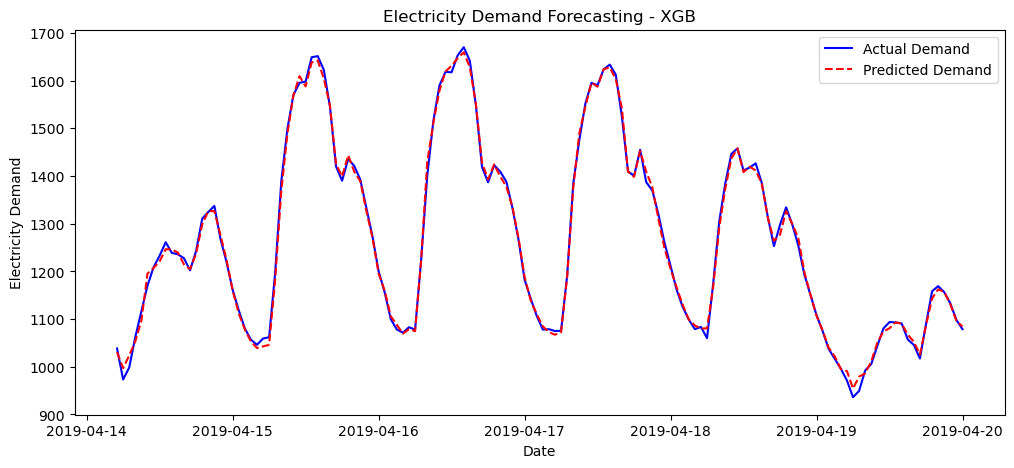

In [14]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted demand
plt.figure(figsize=(12, 5))
plt.plot(X_test.index, y_test, label="Actual Demand", color="blue")
plt.plot(X_test.index,y_test_pred, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Forecasting - XGB")
plt.legend()
plt.show()

Mean Absolute Error (MAE): 24.67
Root Mean Squared Error (RMSE): 30.96


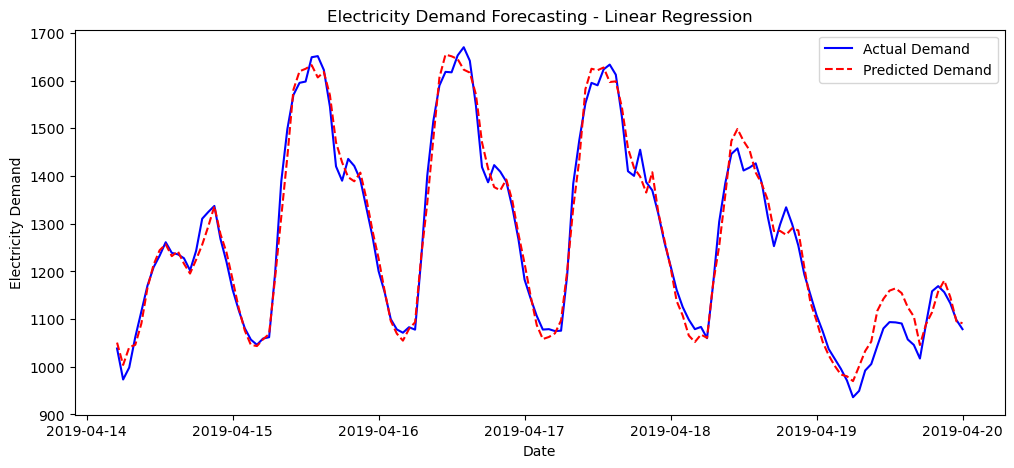

In [15]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize and fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted demand
plt.figure(figsize=(12, 5))
plt.plot(X_test.index, y_test, label="Actual Demand", color="blue")
plt.plot(X_test.index, y_test_pred, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand Forecasting - Linear Regression")
plt.legend()
plt.show()


Naive Forecast - Mean Absolute Error (MAE): 44.93
Naive Forecast - Root Mean Squared Error (RMSE): 59.02


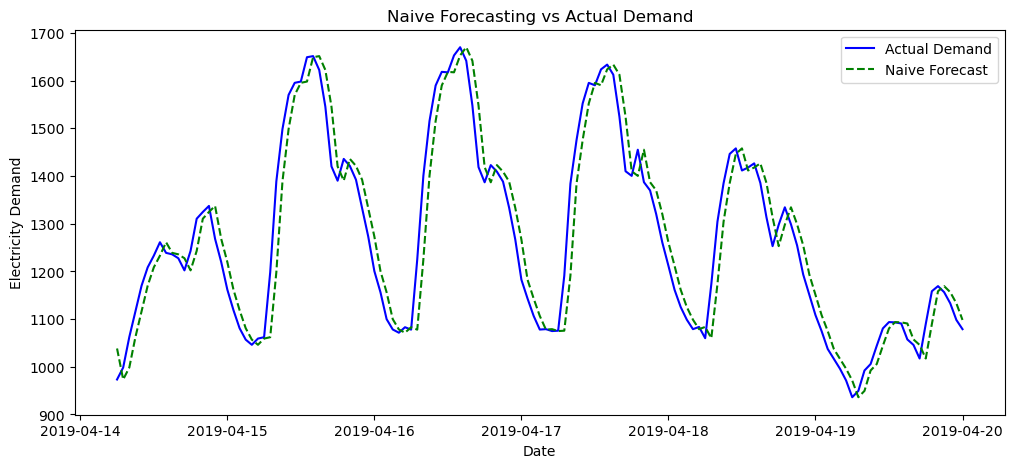

In [16]:
# Create the Naive Forecast model (shifted by 1 step)
y_test_naive_pred = y_test.shift(1)

# Drop the first NaN value created by the shift from both y_test and y_test_naive_pred
y_test_naive_pred = y_test_naive_pred.dropna()
y_test = y_test.iloc[1:]

# Evaluate the Naive Forecast model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_naive = mean_absolute_error(y_test, y_test_naive_pred)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_test_naive_pred))

print(f"Naive Forecast - Mean Absolute Error (MAE): {mae_naive:.2f}")
print(f"Naive Forecast - Root Mean Squared Error (RMSE): {rmse_naive:.2f}")

# Plot actual vs Naive forecast demand
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(X_test.index[1:], y_test, label="Actual Demand", color="blue")  # Adjust X_test.index
plt.plot(X_test.index[1:], y_test_naive_pred, label="Naive Forecast", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Naive Forecasting vs Actual Demand")
plt.legend()
plt.show()


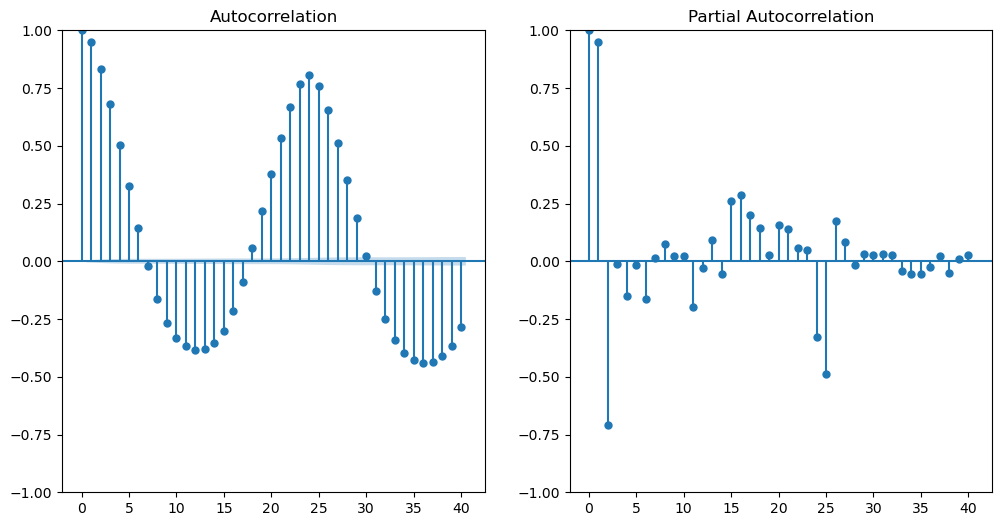

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(train_df["DEMAND"], lags=40, ax=plt.gca())

plt.subplot(122)
plot_pacf(train_df["DEMAND"], lags=40, ax=plt.gca())

plt.show()


In [18]:
# import pmdarima as pm
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np
# import matplotlib.pyplot as plt

# # Fit the best ARIMA model using auto_arima
# def fit_best_arima_model(train_data):
#     # Automatically find the best (p, d, q) parameters
#     model = pm.auto_arima(train_data, seasonal=False, trace=True, suppress_warnings=True, stepwise=True)
#     return model

# # Forecast with the fitted ARIMA model
# def forecast_arima(model, steps):
#     forecast = model.predict(n_periods=steps)
#     return forecast

# # Fit the best ARIMA model on the training data
# best_arima_model = fit_best_arima_model(y_train)

# # Forecast the demand for the test set
# y_test_arima_pred = forecast_arima(best_arima_model, steps=len(y_test))

# # Evaluate the model on the test data
# mae_arima = mean_absolute_error(y_test, y_test_arima_pred)
# rmse_arima = np.sqrt(mean_squared_error(y_test, y_test_arima_pred))

# # Print the evaluation results
# print(f"Best ARIMA Model - Mean Absolute Error (MAE): {mae_arima:.2f}")
# print(f"Best ARIMA Model - Root Mean Squared Error (RMSE): {rmse_arima:.2f}")

# # Plot actual vs predicted demand for ARIMA
# plt.figure(figsize=(12, 5))
# plt.plot(y_test.index, y_test, label="Actual Demand", color="blue")
# plt.plot(y_test.index, y_test_arima_pred, label="Predicted Demand", color="red", linestyle="dashed")
# plt.xlabel("Date")
# plt.ylabel("Electricity Demand")
# plt.title("ARIMA Model Forecasting (Auto-ARIMA)")
# plt.legend()
# plt.show()

# # Display the summary of the best ARIMA model
# print("Best ARIMA Model Summary:")
# print(best_arima_model.summary())


Performing stepwise search to minimize aic


KeyboardInterrupt: 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  58.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  58.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  58.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  59.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  59.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  59.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total t

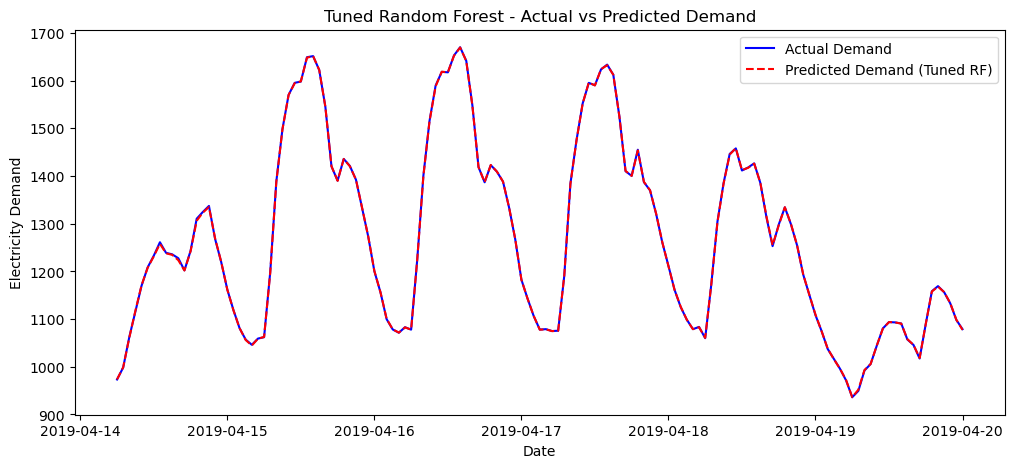

In [19]:
# Import necessary libraries for GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# (Assuming X_train, X_test, y_train, y_test are already properly created)

# Step 1: Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Step 2: Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Step 3: Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Step 4: Align X_test and y_test before fitting (important if there were previous drops)
X_test_aligned, y_test_aligned = X_test.align(y_test, join='inner', axis=0)

# Step 5: Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters from Grid Search:", best_params)
print(f"Best Cross-validation Score (Negative MSE): {best_score:.2f}")

# Step 7: Use the best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Step 8: Make predictions on the aligned test data
y_pred_rf = best_rf_model.predict(X_test_aligned)

# Step 9: Evaluate the best model
mae_rf = mean_absolute_error(y_test_aligned, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_aligned, y_pred_rf))

print(f"Random Forest (Tuned) - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest (Tuned) - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

# Step 10: Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test_aligned.index, y_test_aligned, label="Actual Demand", color="blue")
plt.plot(y_test_aligned.index, y_pred_rf, label="Predicted Demand (Tuned RF)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Tuned Random Forest - Actual vs Predicted Demand")
plt.legend()
plt.show()



In [ ]:
# Import necessary libraries for SVM and GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Align X_test and y_test
X_test, y_test = X_test.align(y_test, join='inner', axis=0)

param_grid = {
    'C': [1, 10],
    'epsilon': [0.1, 0.5],
    'kernel': ['rbf']
}

random_search = RandomizedSearchCV(
    SVR(), param_distributions=param_grid,
    n_iter=4, cv=3, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=1, random_state=42
)
random_search.fit(X_train, y_train)

svr_best = random_search.best_estimator_
y_pred = svr_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best SVR Parameters:", random_search.best_params_)
print(f"SVR MAE: {mae:.2f}, RMSE: {rmse:.2f}")

plt.figure(figsize=(10, 4))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="dashed")
plt.title("SVR - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.tight_layout()
plt.show()




Fitting 3 folds for each of 4 candidates, totalling 12 fits


KeyboardInterrupt: 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.9s
[CV] END criterion=squared_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.9s
[CV] END criterion=squared_error, max_depth=10, max

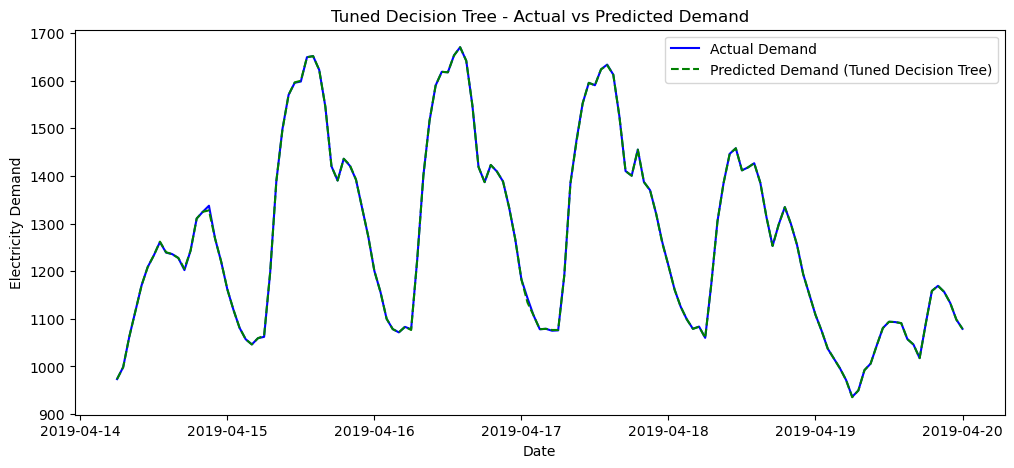

In [22]:
# Import necessary libraries for Decision Tree and GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid for Decision Tree Regressor
# Define the reduced parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'criterion': ['squared_error']
}

# Initialize the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Apply GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score from GridSearchCV
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Print the best parameters and best score
print("Best Hyperparameters for Decision Tree from Grid Search:", best_params_dt)
print(f"Best Cross-validation Score (Negative MSE) for Decision Tree: {best_score_dt:.2f}")

# Use the best model from Grid Search
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test data using the best model
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the best model - Calculate MAE and RMSE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print(f"Decision Tree (Tuned) - Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Decision Tree (Tuned) - Root Mean Squared Error (RMSE): {rmse_dt:.2f}")

# Plot actual vs predicted demand
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual Demand", color="blue")
plt.plot(y_test.index, y_pred_dt, label="Predicted Demand (Tuned Decision Tree)", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Tuned Decision Tree - Actual vs Predicted Demand")
plt.legend()
plt.show()


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time= 2.4min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time= 2.4min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time= 2.4min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time= 2.4min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time= 2.4min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time= 2.4min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time= 2.

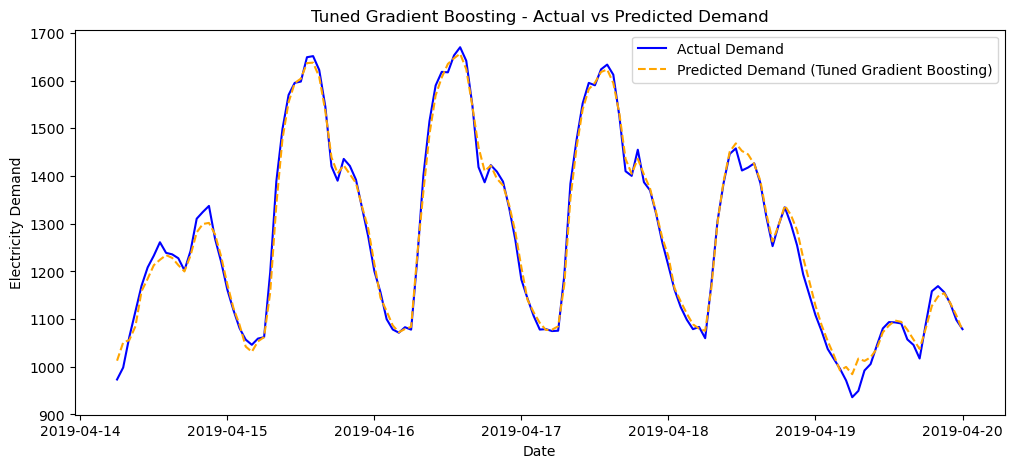

In [23]:
# Import necessary libraries for Gradient Boosting and GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the reduced parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.9],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Apply GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV to the training data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Hyperparameters for Gradient Boosting from Grid Search:", best_params_gb)
print(f"Best Cross-validation Score (Negative MSE) for Gradient Boosting: {best_score_gb:.2f}")

# Use the best model
best_gb_model = grid_search_gb.best_estimator_

# Predict on test data
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting (Tuned) - Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Gradient Boosting (Tuned) - Root Mean Squared Error (RMSE): {rmse_gb:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual Demand", color="blue")
plt.plot(y_test.index, y_pred_gb, label="Predicted Demand (Tuned Gradient Boosting)", color="orange", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Tuned Gradient Boosting - Actual vs Predicted Demand")
plt.legend()
plt.show()


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   4.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_d

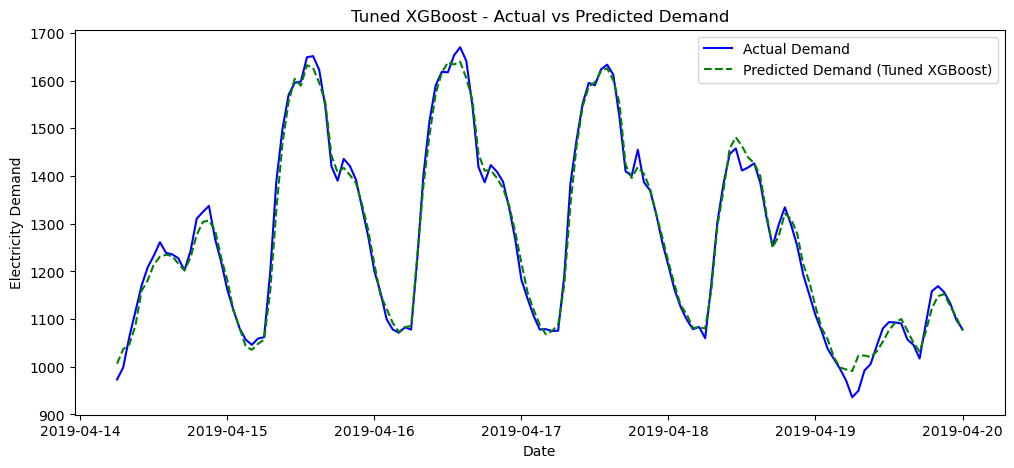

In [24]:
# Import necessary libraries for XGBoost and GridSearchCV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter grid for XGBoost
# Define reduced parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.9],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1]
}

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Apply GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Best parameters and score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Hyperparameters for XGBoost from Grid Search:", best_params_xgb)
print(f"Best Cross-validation Score (Negative MSE) for XGBoost: {best_score_xgb:.2f}")

# Use the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost (Tuned) - Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"XGBoost (Tuned) - Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual Demand", color="blue")
plt.plot(y_test.index, y_pred_xgb, label="Predicted Demand (Tuned XGBoost)", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Tuned XGBoost - Actual vs Predicted Demand")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/

                               SARIMAX Results                                
Dep. Variable:                 DEMAND   No. Observations:               191440
Model:                 ARIMA(2, 1, 0)   Log Likelihood            -1001180.236
Date:                Mon, 28 Apr 2025   AIC                        2002366.471
Time:                        16:13:57   BIC                        2002396.958
Sample:                             0   HQIC                       2002375.461
                             - 191440                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7422      0.001    966.473      0.000       0.741       0.744
ar.L2         -0.1164      0.002    -67.571      0.000      -0.120      -0.113
sigma2      2041.9275      2.163    943.915      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


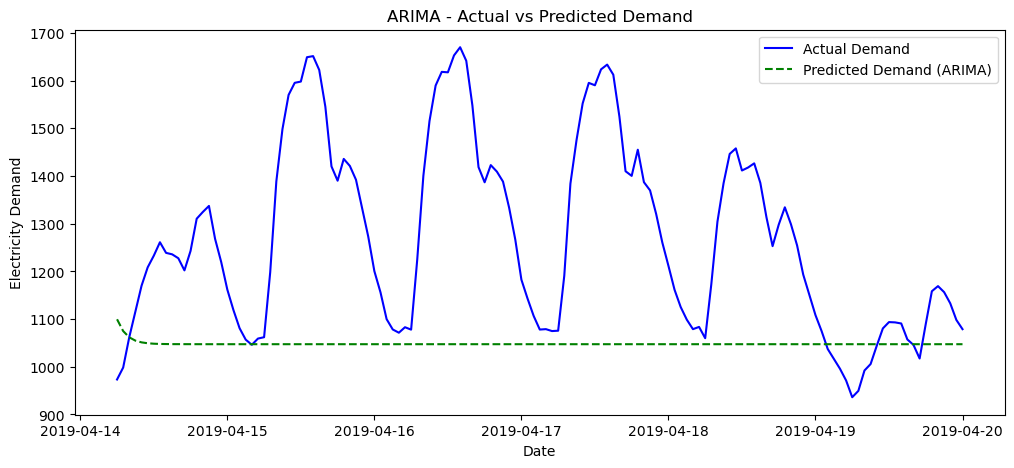

In [25]:
# Import necessary libraries for ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -----------------------------
# Check for stationarity of the series
# -----------------------------
# If the series is not stationary, differencing might be needed.
# For simplicity, we'll use the original data and assume it's stationary for now.

# -----------------------------
# Fit the ARIMA model
# -----------------------------
# Define ARIMA parameters (p=2, d=1, q=0)
p, d, q = 2, 1, 0  # ARIMA(2, 1, 0) is our starting configuration

# Initialize and fit the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))
arima_fit = arima_model.fit()

# Print model summary
print(arima_fit.summary())

# -----------------------------
# Make predictions using the fitted ARIMA model
# -----------------------------
# Forecast on the test set
y_pred_arima = arima_fit.forecast(steps=len(y_test))

# -----------------------------
# Evaluate the ARIMA model
# -----------------------------
# Calculate MAE and RMSE
mae_arima = mean_absolute_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))

# Print evaluation metrics
print(f"ARIMA - Mean Absolute Error (MAE): {mae_arima:.2f}")
print(f"ARIMA - Root Mean Squared Error (RMSE): {rmse_arima:.2f}")

# -----------------------------
# Plot actual vs predicted demand
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual Demand", color="blue")
plt.plot(y_test.index, y_pred_arima, label="Predicted Demand (ARIMA)", color="green", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("ARIMA - Actual vs Predicted Demand")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
5981/5981 ━━━━━━━━━━━━━━━━━━━━ 141s 23ms/step - loss: 0.0080
Epoch 2/2
5981/5981 ━━━━━━━━━━━━━━━━━━━━ 152s 25ms/step - loss: 7.2302e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
LSTM - Mean Absolute Error (MAE): 23.56
LSTM - Root Mean Squared Error (RMSE): 30.12


ValueError: x and y must have same first dimension, but have shapes (139,) and (79, 1)

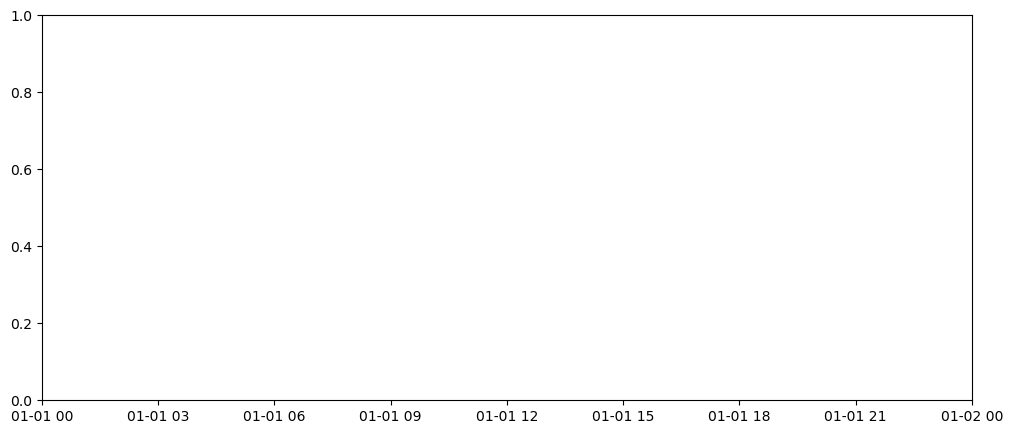

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

time_step = 60  # Number of previous time steps to use for prediction
X_train_lstm, y_train_lstm = create_dataset(y_train_scaled, time_step)
X_test_lstm, y_test_lstm = create_dataset(y_test_scaled, time_step)

# Reshape data for LSTM input
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

# Compile and fit the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=2, batch_size=32)

# Make predictions
predicted_demand_lstm = model_lstm.predict(X_test_lstm)

# Inverse transform predictions and actual values
predicted_demand_lstm = scaler.inverse_transform(predicted_demand_lstm)
y_test_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the model (MAE, RMSE)
mae_lstm = mean_absolute_error(y_test_actual, predicted_demand_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, predicted_demand_lstm))

print(f"LSTM - Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test_actual, label="Actual Demand", color="blue")
plt.plot(y_test.index, predicted_demand_lstm, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("LSTM - Actual vs Predicted Demand")
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
LSTM - Mean Absolute Error (MAE): 23.56
LSTM - Root Mean Squared Error (RMSE): 30.12


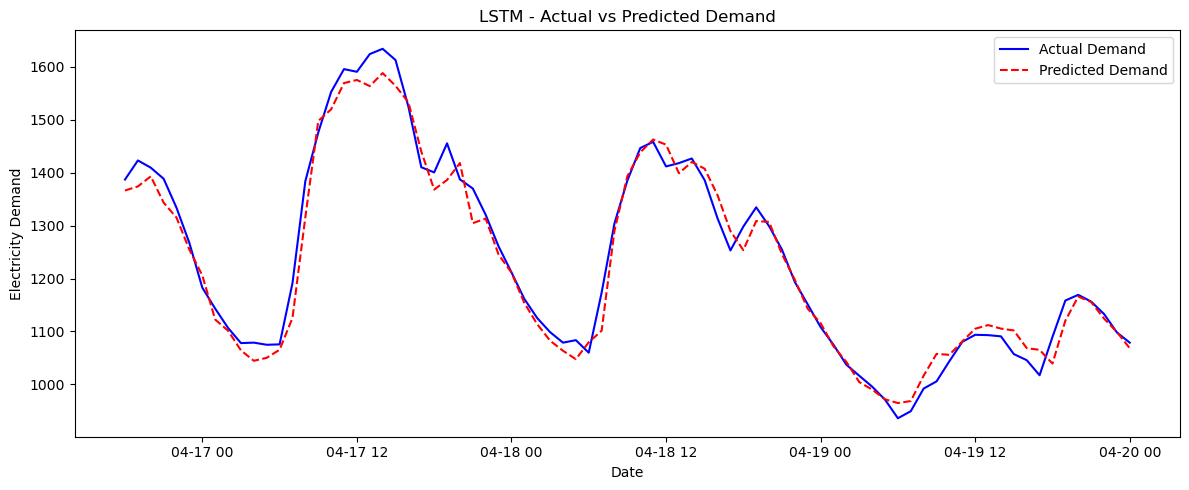

In [28]:
# Make predictions
predicted_demand_lstm = model_lstm.predict(X_test_lstm)

# Inverse transform predictions and actual values
predicted_demand_lstm = scaler.inverse_transform(predicted_demand_lstm)
y_test_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the model (MAE, RMSE)
mae_lstm = mean_absolute_error(y_test_actual, predicted_demand_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, predicted_demand_lstm))

print(f"LSTM - Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")
# Fix the mismatch by slicing the y_test index
aligned_index = y_test.index[time_step:]  # Skip first 'time_step' dates

plt.figure(figsize=(12, 5))
plt.plot(aligned_index, y_test_actual, label="Actual Demand", color="blue")
plt.plot(aligned_index, predicted_demand_lstm, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("LSTM - Actual vs Predicted Demand")
plt.legend()
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
5981/5981 ━━━━━━━━━━━━━━━━━━━━ 138s 23ms/step - loss: 0.0080
Epoch 2/2
5981/5981 ━━━━━━━━━━━━━━━━━━━━ 136s 23ms/step - loss: 7.4489e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
GRU - Mean Absolute Error (MAE): 23.13
GRU - Root Mean Squared Error (RMSE): 29.77


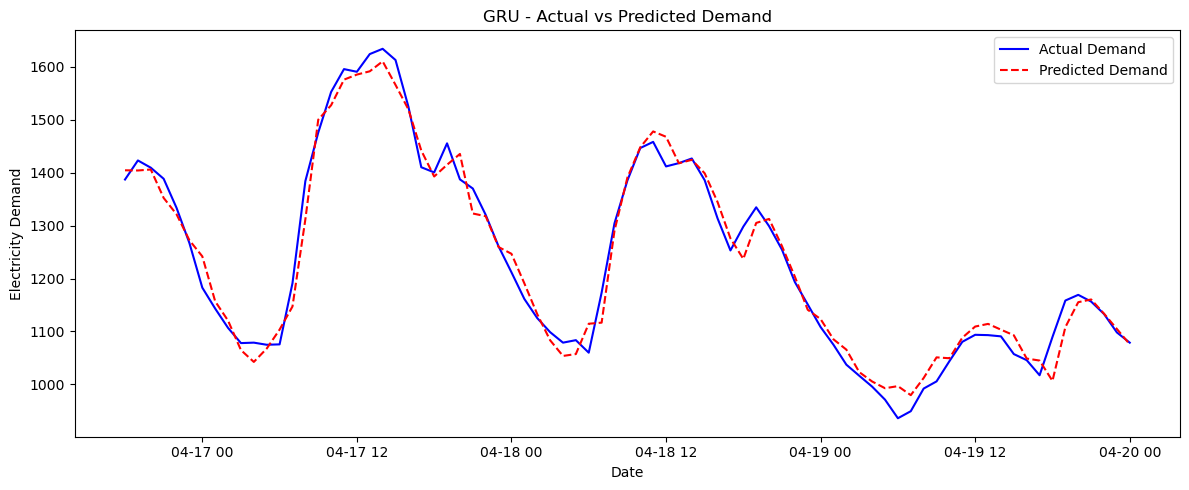

In [29]:
from tensorflow.keras.layers import GRU

# Build GRU model
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=50, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=1))

# Compile and fit the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train_lstm, y_train_lstm, epochs=2, batch_size=32)

# Make predictions
predicted_demand_gru = model_gru.predict(X_test_lstm)

# Inverse transform predictions and actual values
predicted_demand_gru = scaler.inverse_transform(predicted_demand_gru)
y_test_actual_gru = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the model (MAE, RMSE)
mae_gru = mean_absolute_error(y_test_actual_gru, predicted_demand_gru)
rmse_gru = np.sqrt(mean_squared_error(y_test_actual_gru, predicted_demand_gru))

print(f"GRU - Mean Absolute Error (MAE): {mae_gru:.2f}")
print(f"GRU - Root Mean Squared Error (RMSE): {rmse_gru:.2f}")

# Plot the results
aligned_index = y_test.index[time_step:]  # shift by 60

plt.figure(figsize=(12, 5))
plt.plot(aligned_index, y_test_actual_gru, label="Actual Demand", color="blue")
plt.plot(aligned_index, predicted_demand_gru, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("GRU - Actual vs Predicted Demand")
plt.legend()
plt.tight_layout()
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/2
5981/5981 ━━━━━━━━━━━━━━━━━━━━ 105s 17ms/step - loss: 0.0091
Epoch 2/2
5981/5981 ━━━━━━━━━━━━━━━━━━━━ 126s 21ms/step - loss: 8.1147e-04
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3c8dbad40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
CNN-LSTM - Mean Absolute Error (MAE): 24.09
CNN-LSTM - Ro

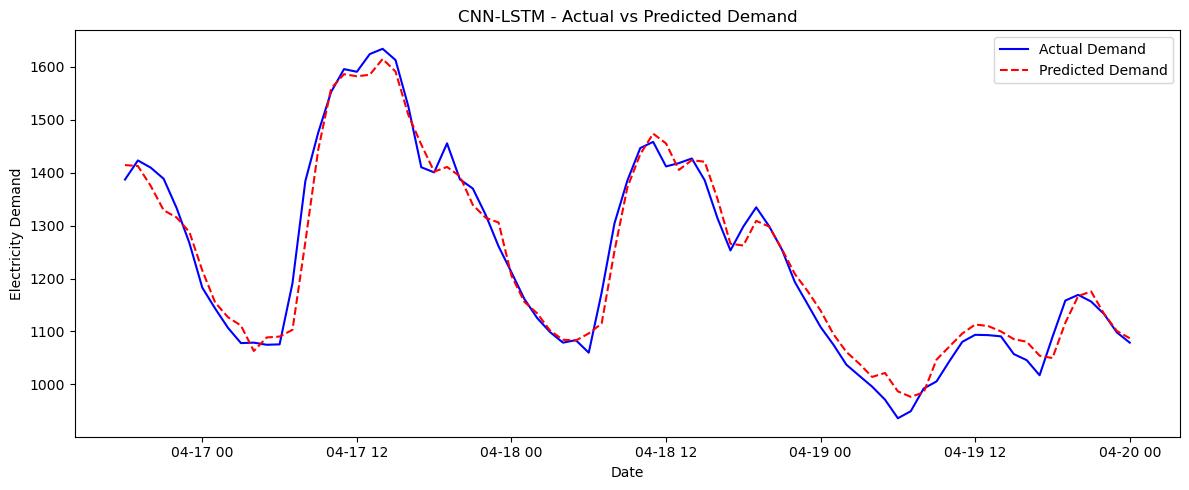

In [30]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

# Build CNN-LSTM Hybrid model
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(units=50, return_sequences=False))
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Dense(units=1))

# Compile and fit the model
model_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_cnn_lstm.fit(X_train_lstm, y_train_lstm, epochs=2, batch_size=32)

# Make predictions
predicted_demand_cnn_lstm = model_cnn_lstm.predict(X_test_lstm)

# Inverse transform predictions and actual values
predicted_demand_cnn_lstm = scaler.inverse_transform(predicted_demand_cnn_lstm)
y_test_actual_cnn_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the model (MAE, RMSE)
mae_cnn_lstm = mean_absolute_error(y_test_actual_cnn_lstm, predicted_demand_cnn_lstm)
rmse_cnn_lstm = np.sqrt(mean_squared_error(y_test_actual_cnn_lstm, predicted_demand_cnn_lstm))

print(f"CNN-LSTM - Mean Absolute Error (MAE): {mae_cnn_lstm:.2f}")
print(f"CNN-LSTM - Root Mean Squared Error (RMSE): {rmse_cnn_lstm:.2f}")


aligned_index = y_test.index[time_step:]  # shift by 60

plt.figure(figsize=(12, 5))
plt.plot(aligned_index, y_test_actual_cnn_lstm, label="Actual Demand", color="blue")
plt.plot(aligned_index, predicted_demand_cnn_lstm, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("CNN-LSTM - Actual vs Predicted Demand")
plt.legend()
plt.tight_layout()
plt.show()


In [73]:
!pip install tensorflow_probability

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.6/173.6 kB 1.1 MB/s eta 0:00:00a 0:00:01


Epoch 1/2


/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5981/5981 ━━━━━━━━━━━━━━━━━━━━ 311s 50ms/step - loss: 0.0372 - val_loss: 5.6839e-04
Epoch 2/2
5981/5981 ━━━━━━━━━━━━━━━━━━━━ 304s 51ms/step - loss: 7.5118e-04 - val_loss: 0.0011


/opt/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
TFT - Mean Absolute Error (MAE): 29.57
TFT - Root Mean Squared Error (RMSE): 38.95


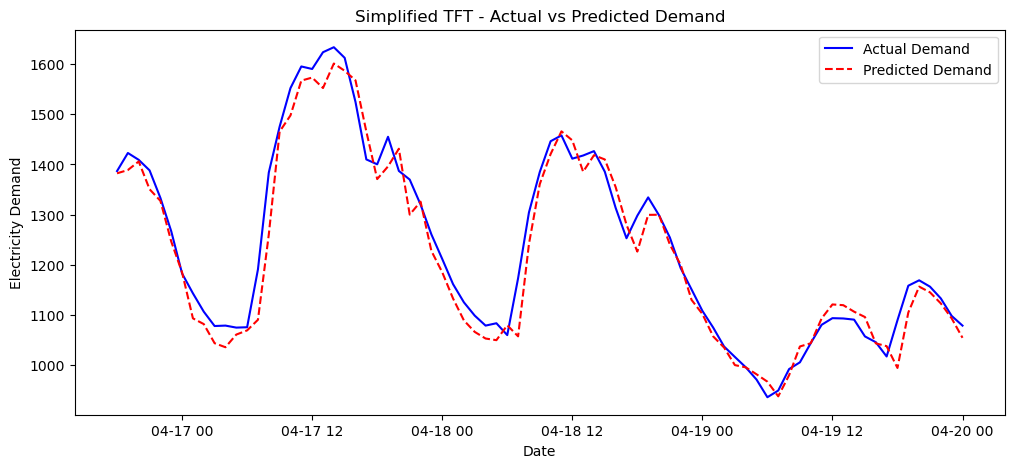

In [31]:
# ======== 1. Imports ========
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ======== 2. Preprocessing ========

# Example: Assume you already have your train and test data
# y_train, y_test must be defined already
# Replace this with your actual DataFrame loading code if needed.

# Define time steps for sliding window
time_steps = 60

# Sliding window dataset creation
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Prepare sliding window datasets
X_train, y_train_final = create_dataset(y_train_scaled, time_steps)
X_test, y_test_final = create_dataset(y_test_scaled, time_steps)

# Reshape inputs for LSTM/Transformer (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# ======== 3. Model Definition (Simplified TFT) ========

class SimplifiedTFT(Model):
    def __init__(self, time_steps, num_features, output_size):
        super(SimplifiedTFT, self).__init__()

        # Feature selection layer
        self.feature_selection = Dense(num_features, activation='softmax')

        # LSTM Encoder
        self.encoder_lstm = LSTM(64, return_sequences=True)

        # LSTM Decoder
        self.decoder_lstm = LSTM(64, return_sequences=True)

        # Multi-Head Attention
        self.attention = keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)

        # Layer Normalization
        self.layer_norm = LayerNormalization()

        # Final dense layer
        self.final_dense = Dense(output_size)

    def call(self, inputs):
        # Feature selection
        feature_weights = self.feature_selection(tf.reduce_mean(inputs, axis=1))
        feature_weights = tf.expand_dims(feature_weights, axis=1)
        selected_inputs = inputs * feature_weights

        # Encoder
        encoder_output = self.encoder_lstm(selected_inputs)

        # Decoder
        decoder_output = self.decoder_lstm(encoder_output)

        # Attention mechanism
        attn_output = self.attention(decoder_output, decoder_output)

        # Residual connection + Layer Normalization
        output = self.layer_norm(attn_output + decoder_output)

        # Final prediction (take last time step output)
        final_output = self.final_dense(output[:, -1, :])

        return final_output

# Instantiate the model
model = SimplifiedTFT(time_steps=time_steps, num_features=1, output_size=1)

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# ======== 4. Training ========

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_final,
    epochs=2,
    batch_size=32,
    validation_data=(X_test, y_test_final),
    callbacks=[early_stopping],
    verbose=1
)

# ======== 5. Predictions and Inverse Scaling ========

# Predict
predicted = model.predict(X_test)

# Inverse transform to original scale
predicted = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test_final.reshape(-1, 1))

# ======== 6. Evaluation ========

mae = mean_absolute_error(y_test_actual, predicted)
rmse = np.sqrt(mean_squared_error(y_test_actual, predicted))

print(f"TFT - Mean Absolute Error (MAE): {mae:.2f}")
print(f"TFT - Root Mean Squared Error (RMSE): {rmse:.2f}")

# ======== 7. Plotting ========

plt.figure(figsize=(12, 5))
plt.plot(y_test.index[time_steps:], y_test_actual, label="Actual Demand", color="blue")
plt.plot(y_test.index[time_steps:], predicted, label="Predicted Demand", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Electricity Demand")
plt.title("Simplified TFT - Actual vs Predicted Demand")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/

[Hybrid 1] ARIMA+MLP -> MAE: 223.43 | RMSE: 292.42


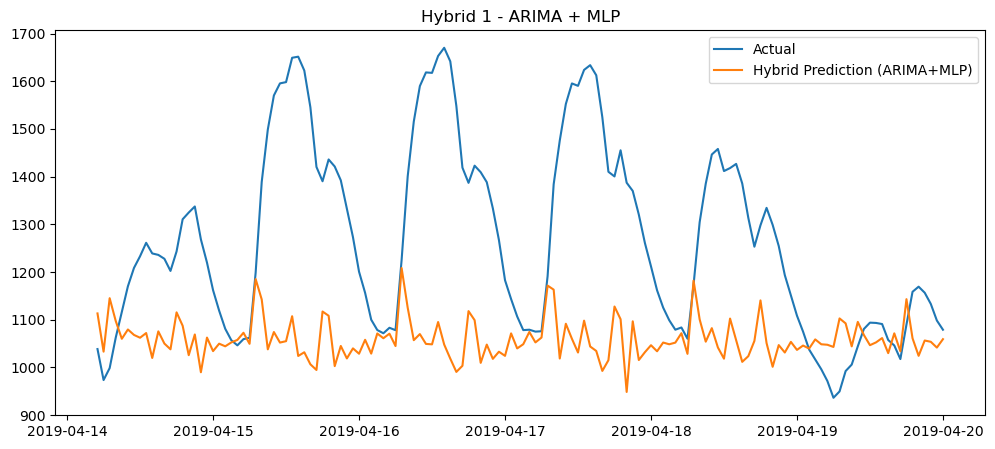

In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Fit ARIMA on y_train
arima_model = ARIMA(y_train, order=(2,1,0))
arima_result = arima_model.fit()

# Step 2: Predict using ARIMA
arima_forecast_train = arima_result.predict(start=y_train.index[0], end=y_train.index[-1])
residuals_train = y_train - arima_forecast_train

# Step 3: Train MLP on ARIMA residuals
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train, residuals_train)

# Step 4: Predict ARIMA on test set
arima_forecast_test = arima_result.forecast(steps=len(X_test))

# Step 5: Predict residuals using MLP
mlp_residuals_test = mlp_model.predict(X_test)

# Step 6: Final prediction
final_pred = arima_forecast_test + mlp_residuals_test

# Step 7: Evaluate
mae = mean_absolute_error(y_test, final_pred)
rmse = np.sqrt(mean_squared_error(y_test, final_pred))

print(f"[Hybrid 1] ARIMA+MLP -> MAE: {mae:.2f} | RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, final_pred, label="Hybrid Prediction (ARIMA+MLP)")
plt.legend()
plt.title("Hybrid 1 - ARIMA + MLP")
plt.show()


[Hybrid 2] RF+XGB+ARIMA -> MAE: 78.26 | RMSE: 100.14


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


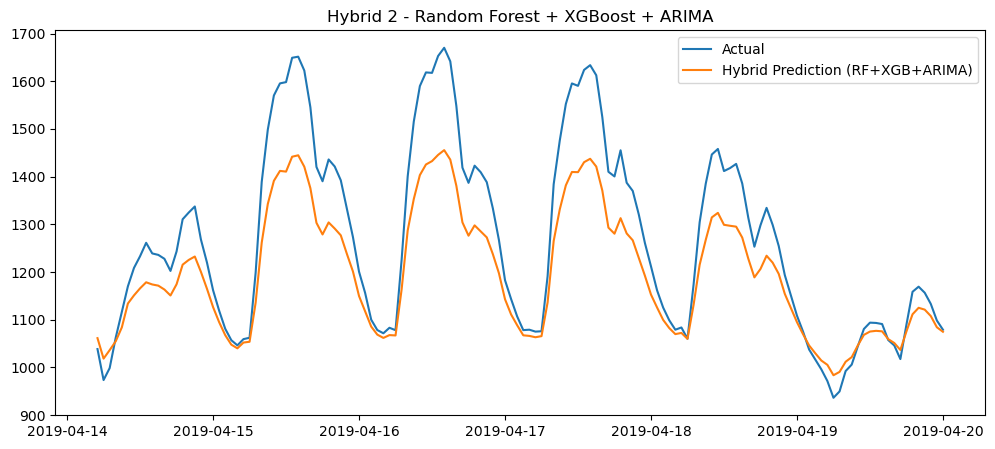

In [40]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Train ARIMA (already trained above, reuse)
# arima_result is available
arima_forecast_test = arima_result.forecast(steps=len(X_test))

# Combine all predictions (simple average)
final_pred = (rf_preds + xgb_preds + arima_forecast_test) / 3

# Evaluate
mae = mean_absolute_error(y_test, final_pred)
rmse = np.sqrt(mean_squared_error(y_test, final_pred))

print(f"[Hybrid 2] RF+XGB+ARIMA -> MAE: {mae:.2f} | RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, final_pred, label="Hybrid Prediction (RF+XGB+ARIMA)")
plt.legend()
plt.title("Hybrid 2 - Random Forest + XGBoost + ARIMA")
plt.show()


In [41]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Set random seed
torch.manual_seed(42)

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take last time step output
        return out

# Hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 1
num_layers = 2
num_epochs = 2
batch_size = 32
learning_rate = 0.001

# Prepare data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)  # [batch, seq, features]
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize and train LSTM
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Predict with LSTM
model.eval()
with torch.no_grad():
    lstm_preds = model(X_test_tensor).squeeze().numpy()

# Step 2: Residuals (y_test - LSTM predictions)
residuals = y_test.values - lstm_preds

# Step 3: XGBoost on residuals
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, residuals)

# Step 4: XGBoost predicts residuals on X_test
xgb_residual_preds = xgb_model.predict(X_test)

# Step 5: Final prediction
final_pred = lstm_preds + xgb_residual_preds

# Evaluate
mae = mean_absolute_error(y_test, final_pred)
rmse = np.sqrt(mean_squared_error(y_test, final_pred))

print(f"[Hybrid 3] LSTM+XGBoost -> MAE: {mae:.2f} | RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, final_pred, label="Hybrid Prediction (LSTM+XGB)")
plt.legend()
plt.title("Hybrid 3 - LSTM + XGBoost (Stacking)")
plt.show()


In [ ]:
# Libraries
import statsmodels.api as sm
from prophet import Prophet
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ================================
# Step 1: ARIMA
# ================================
print("Training ARIMA...")

# Fit ARIMA on y_train only
arima_model = sm.tsa.ARIMA(y_train, order=(2,1,1))
arima_result = arima_model.fit()

# Predict with ARIMA
arima_forecast = arima_result.forecast(steps=len(y_test))

# ================================
# Step 2: Prophet
# ================================
print("Training Prophet...")

# Prepare data for Prophet
prophet_train = y_train.reset_index()
prophet_train.columns = ['ds', 'y']

# Fit Prophet
prophet_model = Prophet()
prophet_model.fit(prophet_train)

# Prepare future dates for Prophet
future = y_test.reset_index()[['datetime']]
future.columns = ['ds']

# Predict with Prophet
prophet_forecast = prophet_model.predict(future)['yhat'].values

# ================================
# Step 3: LSTM
# ================================
print("Training LSTM...")

# Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 1
num_layers = 2
num_epochs = 2
batch_size = 32
learning_rate = 0.001

# Prepare data for LSTM
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train LSTM
lstm_model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        print(f"LSTM Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Predict with LSTM
lstm_model.eval()
with torch.no_grad():
    lstm_forecast = lstm_model(X_test_tensor).squeeze().numpy()

# ================================
# Step 4: Ensemble Averaging
# ================================
print("Combining predictions...")

# Make sure all forecasts are numpy arrays
arima_forecast = np.array(arima_forecast)
prophet_forecast = np.array(prophet_forecast)
lstm_forecast = np.array(lstm_forecast)

# Average the forecasts
final_ensemble_forecast = (arima_forecast + prophet_forecast + lstm_forecast) / 3

# ================================
# Step 5: Evaluation
# ================================
mae = mean_absolute_error(y_test, final_ensemble_forecast)
rmse = np.sqrt(mean_squared_error(y_test, final_ensemble_forecast))

print(f"[Hybrid 4] ARIMA + Prophet + LSTM Ensemble -> MAE: {mae:.2f} | RMSE: {rmse:.2f}")

# ================================
# Step 6: Plot
# ================================
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, final_ensemble_forecast, label='Ensemble Prediction', linestyle='--')
plt.legend()
plt.title('Hybrid 4: ARIMA + Prophet + LSTM Ensemble Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.show()


Training ARIMA...


NameError: name 'y_train' is not defined

In [ ]:
# Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

# Create a leaderboard list
leaderboard = []

# Helper function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    leaderboard.append({'Model': name, 'MAE': mae, 'RMSE': rmse})

# Add models to leaderboard
evaluate_model('ARIMA', y_test, arima_forecast)
evaluate_model('Prophet', y_test, prophet_forecast)
evaluate_model('LSTM', y_test, lstm_forecast)
evaluate_model('Random Forest', y_test, y_pred_rf)
# evaluate_model('SVM', y_test, y_pred_svr)
evaluate_model('Decision Tree', y_test, y_pred_dt)
evaluate_model('Gradient Boosting', y_test, y_pred_gb )
evaluate_model('XGBoost', y_test, y_pred_xgb )
evaluate_model('Hybrid: ARIMA + XGB', y_test, )
evaluate_model('Hybrid: LSTM + XGB', y_test, final_pred )
evaluate_model('Hybrid: ARIMA + Prophet + LSTM', y_test, final_ensemble_forecast)

# Convert to DataFrame
leaderboard_df = pd.DataFrame(leaderboard)

# Sort leaderboard by MAE (lower is better)
leaderboard_df = leaderboard_df.sort_values(by="MAE").reset_index(drop=True)

# Show the leaderboard
leaderboard_df


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot MAE for all models
sns


Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2394/2394 ━━━━━━━━━━━━━━━━━━━━ 52s 21ms/step - loss: 0.0072
Epoch 2/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - loss: 0.0015
Epoch 3/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - loss: 0.0011
Epoch 4/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 50s 21ms/step - loss: 9.9465e-04
Epoch 5/5
2394/2394 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - loss: 9.2685e-04
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
LSTM Model MAE: 41.82, RMSE: 55.77


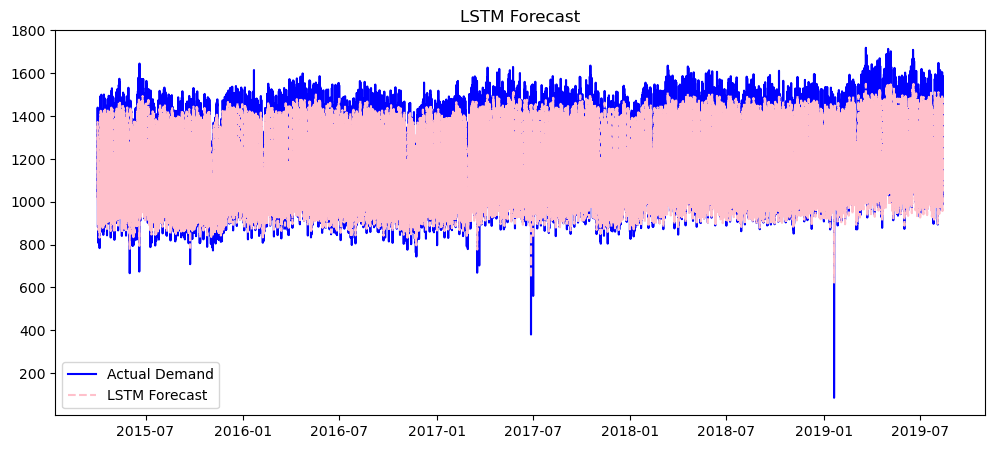

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize Data
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape Data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mse")

# Train Model
lstm_model.fit(X_train_lstm, y_train_scaled, epochs=5, batch_size=64, verbose=1)

# Predictions
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)  # Convert back to original scale

# Evaluate
mae = mean_absolute_error(y_test, lstm_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f"LSTM Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="LSTM Forecast", color="pink", linestyle="dashed")
plt.title("LSTM Forecast")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
# file_path = "train_dataframes.xlsx"
xls = pd.ExcelFile(file_path)

# Load selected sheets
selected_sheets = xls.sheet_names[:5]
df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in selected_sheets]
df = pd.concat(df_list, ignore_index=True)

# Convert datetime column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Create Lag & Rolling Features
df["lag_1"] = df["DEMAND"].shift(1)
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values
df.dropna(inplace=True)

# Define Features & Target
features = ["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]
target = "DEMAND"

# Train-Test Split (80-20)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]


In [ ]:
!pip install prophet

  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 3.4 MB/s eta 0:00:00a 0:00:01
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)


00:20:18 - cmdstanpy - INFO - Chain [1] start processing
00:20:56 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model MAE: 268.56, RMSE: 297.10


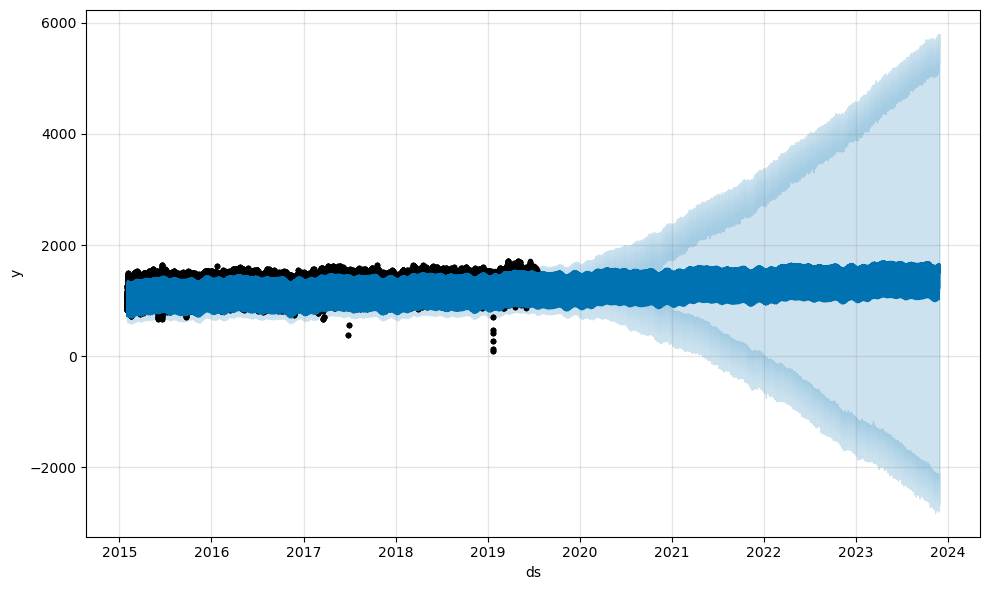

In [ ]:
from prophet import Prophet

# Prepare Data for Prophet
prophet_df = df.reset_index()[["datetime", "DEMAND"]].rename(columns={"datetime": "ds", "DEMAND": "y"})

# Train & Test Split
train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

# Train Prophet Model
prophet_model = Prophet()
prophet_model.fit(train_prophet)

# Make Future Predictions
future = prophet_model.make_future_dataframe(periods=len(test), freq='H')
forecast = prophet_model.predict(future)

# Extract Predictions
prophet_predictions = forecast["yhat"].iloc[-len(test):].values

# Evaluate
mae = mean_absolute_error(y_test, prophet_predictions)
rmse = np.sqrt(mean_squared_error(y_test, prophet_predictions))
print(f"Prophet Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot
prophet_model.plot(forecast)
plt.show()


In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.7 MB/s eta 0:00:0000:0100:01


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 153191, number of used features: 6
[LightGBM] [Info] Start training from score 1176.609996
LightGBM Model MAE: 12.78, RMSE: 18.15


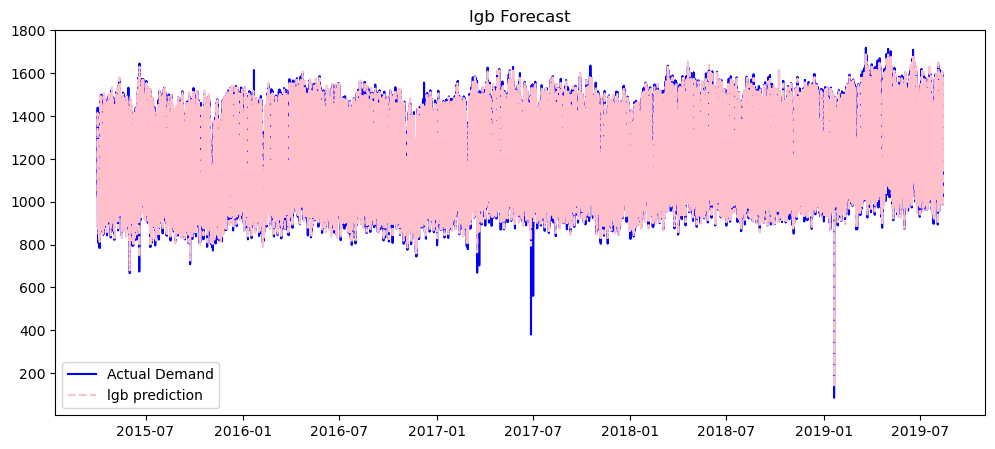

In [ ]:
import lightgbm as lgb

# Train LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05, max_depth=7)
lgb_model.fit(X_train, y_train)

# Predictions
lgb_predictions = lgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, lgb_predictions)
rmse = np.sqrt(mean_squared_error(y_test, lgb_predictions))
print(f"LightGBM Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lgb_predictions, label="lgb prediction", color="pink", linestyle="dashed")
plt.title("lgb Forecast")
plt.legend()
plt.show()


Random Forest Model MAE: 12.32, RMSE: 17.01


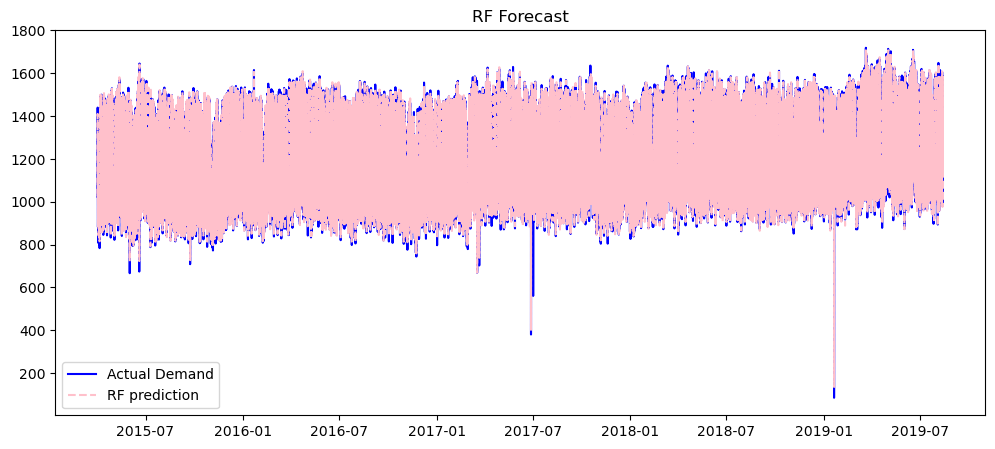

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, rf_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, rf_predictions, label="RF prediction", color="pink", linestyle="dashed")
plt.title("RF Forecast")
plt.legend()
plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 6.2 MB/s eta 0:00:0000:0100:01


CatBoost Model MAE: 14.26, RMSE: 20.24


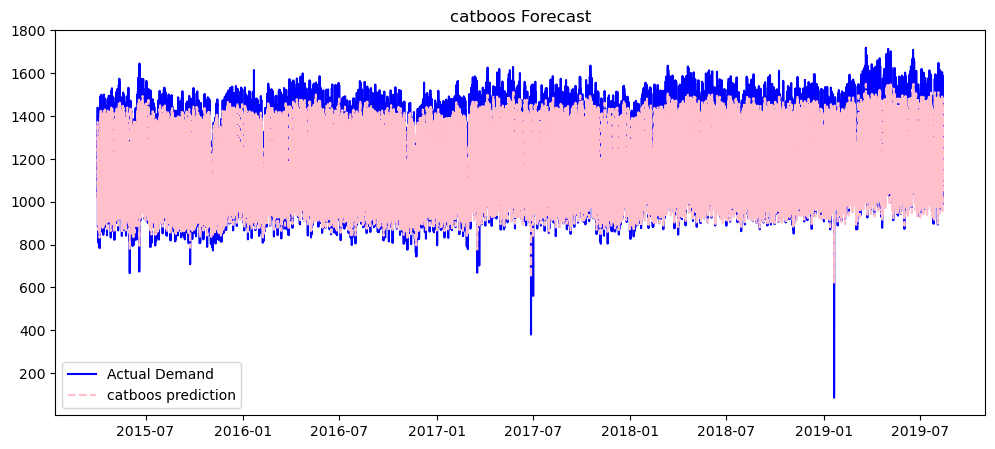

In [ ]:
from catboost import CatBoostRegressor

# Train CatBoost Model
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions
catboost_predictions = catboost_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, catboost_predictions)
rmse = np.sqrt(mean_squared_error(y_test, catboost_predictions))
print(f"CatBoost Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="catboos prediction", color="pink", linestyle="dashed")
plt.title("catboos Forecast")
plt.legend()
plt.show()


Gradient Boosting Model MAE: 12.84, RMSE: 17.95


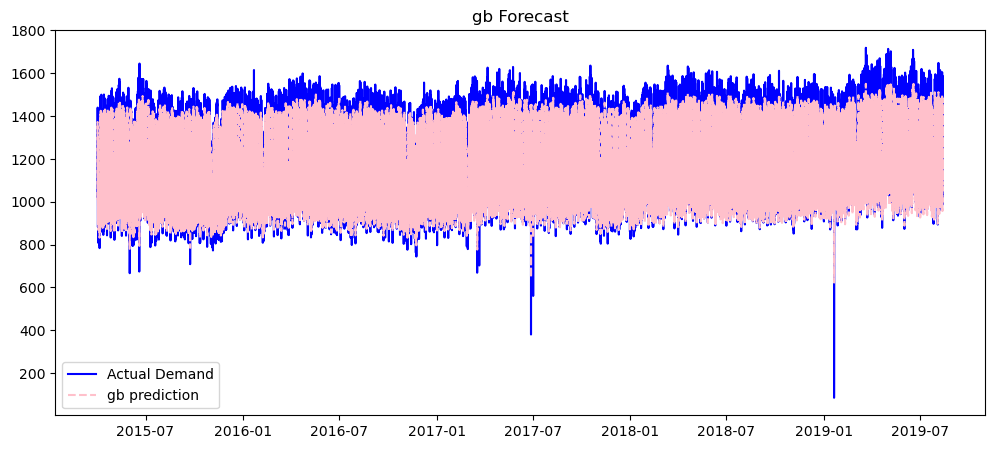

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)

# Predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, gb_predictions)
rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
print(f"Gradient Boosting Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="gb prediction", color="pink", linestyle="dashed")
plt.title("gb Forecast")
plt.legend()
plt.show()


In [ ]:
!pip install pytorch_forecasting

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 2.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 2.8 MB/s eta 0:00:0000:0100:01


In [ ]:
from pytorch_forecasting.models.temporal_fusion_transformer import TemporalFusionTransformer
from pytorch_forecasting.data.timeseries import TimeSeriesDataSet
import torch

# Prepare Data for TFT
df["group"] = 0  # Single group for time series
df_tft = df.reset_index()

# Define TimeSeries Dataset for PyTorch Forecasting
max_prediction_length = len(test)
max_encoder_length = len(train)

training = TimeSeriesDataSet(
    df_tft,
    time_idx="datetime",
    target="DEMAND",
    group_ids=["group"],
    time_varying_known_reals=["hour", "dayofweek"],
    time_varying_unknown_reals=["DEMAND"],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
)

# Load Data into PyTorch DataLoader
train_dataloader = training.to_dataloader(train=True, batch_size=32)
test_dataloader = training.to_dataloader(train=False, batch_size=32)

# Initialize TFT Model
tft = TemporalFusionTransformer.from_dataset(training, learning_rate=0.03, hidden_size=16, attention_head_size=4, dropout=0.1)

# Train Model
trainer = pl.Trainer(max_epochs=10)
trainer.fit(tft, train_dataloader)

# Predict
tft_predictions = trainer.predict(tft, test_dataloader)

# Evaluate
mae = mean_absolute_error(y_test, tft_predictions)
rmse = np.sqrt(mean_squared_error(y_test, tft_predictions))
print(f"TFT Model MAE: {mae:.2f}, RMSE: {rmse:.2f}")
# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, y_test, label="Actual Demand", color="blue")
plt.plot(test.index, lstm_predictions, label="gb prediction", color="pink", linestyle="dashed")
plt.title("gb Forecast")
plt.legend()
plt.show()


AssertionError: Timeseries index should be of type integer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "train_dataframes.xlsx"
df = pd.read_excel(file_path)

# Convert datetime column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Feature Engineering
df["lag_1"] = df["DEMAND"].shift(1)
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values
df.dropna(inplace=True)

# Normalize Data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Train-Test Split (80-20)
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

# Convert Data into PyTorch Tensors
X_train = torch.tensor(train[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_train = torch.tensor(train["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(test[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_test = torch.tensor(test["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

# Reshape for LSTMs/GRUs (batch_size, seq_length, features)
X_train_seq = X_train.view(X_train.shape[0], 1, X_train.shape[1])
X_test_seq = X_test.view(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "data/train_dataframes.xlsx"
df = pd.read_excel(file_path)

# Convert datetime column to datetime format
df["datetime"] = pd.to_datetime(df["datetime"])
df.set_index("datetime", inplace=True)

# Feature Engineering
df["lag_1"] = df["DEMAND"].shift(1)
df["lag_3"] = df["DEMAND"].shift(3)
df["lag_7"] = df["DEMAND"].shift(7)
df["rolling_mean_7"] = df["DEMAND"].rolling(window=7).mean()
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

# Drop NaN values
df.dropna(inplace=True)

# Normalize Data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Train-Test Split (80-20)
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]

# Convert Data into PyTorch Tensors
X_train = torch.tensor(train[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_train = torch.tensor(train["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

X_test = torch.tensor(test[["lag_1", "lag_3", "lag_7", "rolling_mean_7", "hour", "dayofweek"]].values, dtype=torch.float32)
y_test = torch.tensor(test["DEMAND"].values, dtype=torch.float32).unsqueeze(1)

# Reshape for LSTMs/GRUs (batch_size, seq_length, features)
X_train_seq = X_train.view(X_train.shape[0], 1, X_train.shape[1])
X_test_seq = X_test.view(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
class CNNLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(CNNLSTM, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2, stride=1)
        self.lstm = nn.LSTM(32, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x, _ = self.lstm(x)
        return self.fc(x[:, -1, :])

cnn_lstm = CNNLSTM(input_size=6, hidden_size=64, num_layers=2)
optimizer = torch.optim.Adam(cnn_lstm.parameters(), lr=0.01)

for epoch in range(50):
    optimizer.zero_grad()
    output = cnn_lstm(X_train_seq)
    loss = nn.MSELoss()(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

cnn_lstm_predictions = cnn_lstm(X_test_seq).detach().numpy()
print(f"CNN-LSTM MAE: {mean_absolute_error(y_test, cnn_lstm_predictions):.2f}")


In [ ]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, x):
        attn_weights = torch.softmax(self.attn(x), dim=1)
        return torch.sum(x * attn_weights, dim=1)

class LSTMAttention(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMAttention, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.attn = Attention(hidden_size)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attn_out = self.attn(lstm_out)
        return self.fc(attn_out)

lstm_attn = LSTMAttention(input_size=6, hidden_size=64, num_layers=2)
optimizer = torch.optim.Adam(lstm_attn.parameters(), lr=0.01)

for epoch in range(50):
    optimizer.zero_grad()
    output = lstm_attn(X_train_seq)
    loss = nn.MSELoss()(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

lstm_attn_predictions = lstm_attn(X_test_seq).detach().numpy()
print(f"LSTM-Attention MAE: {mean_absolute_error(y_test, lstm_attn_predictions):.2f}")


In [ ]:
from transformers import TimeSeriesTransformerForPrediction

class TransformerLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(TransformerLSTM, self).__init__()
        self.transformer = TimeSeriesTransformerForPrediction.from_pretrained("huggingface/timeseries-transformer")
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.transformer(x)
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

trans_lstm = TransformerLSTM(input_size=6, hidden_size=64, num_layers=2)
optimizer = torch.optim.Adam(trans_lstm.parameters(), lr=0.01)

for epoch in range(50):
    optimizer.zero_grad()
    output = trans_lstm(X_train_seq)
    loss = nn.MSELoss()(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

trans_lstm_predictions = trans_lstm(X_test_seq).detach().numpy()
print(f"Transformer-LSTM MAE: {mean_absolute_error(y_test, trans_lstm_predictions):.2f}")


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA Model
arima_model = ARIMA(train["DEMAND"], order=(5, 1, 0)).fit()
arima_preds = arima_model.forecast(len(test))

# Train LSTM Model
lstm_preds = lstm_attn(X_test_seq).detach().numpy()

# Combine ARIMA & LSTM Predictions (Weighted)
hybrid_preds = (0.6 * arima_preds) + (0.4 * lstm_preds.flatten())

print(f"LSTM-ARIMA Hybrid MAE: {mean_absolute_error(y_test, hybrid_preds):.2f}")
